### Task: Image - to - Text using Image Captioning methods -- {SD v2, minDALLE} 

### Imports

In [9]:
import pickle
import matplotlib.pyplot as plt
from PIL import Image
import json
import sklearn
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from trectools import TrecQrel, TrecRun, TrecEval

### Original Flickr8k Dataset

Original captions - Queries

Caption IDs:  977 ['1056338697_4f7d7ce270.jpg#2', '106490881_5a2dd9b7bd.jpg#2', '1082379191_ec1e53f996.jpg#2', '1084040636_97d9633581.jpg#2']

Caption Text:  977 ['A woman is signaling is to traffic , as seen from behind .', 'A young boy in swimming trunks is walking with his arms outstretched on the beach .', 'A man and a woman sitting on a dock .', 'A white dog has its head on the ground .']

Original Images - Retrieval set

Image IDs:  1000 ['1056338697_4f7d7ce270.jpg', '106490881_5a2dd9b7bd.jpg', '1082379191_ec1e53f996.jpg', '1084040636_97d9633581.jpg']



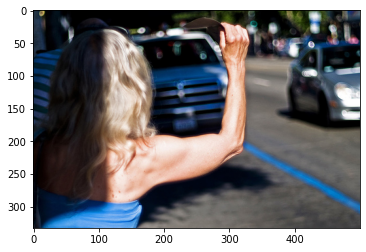

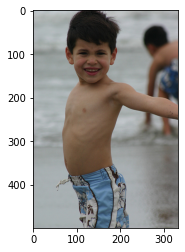

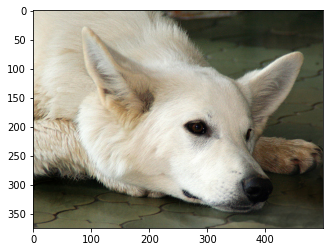

In [10]:
print("Original captions - Queries")
print()
with open("flickr8k_captionid.pkl", "rb") as f:
    flickr8k_captionid = pickle.load(f)
print("Caption IDs: ", len(flickr8k_captionid), flickr8k_captionid[:4])
print()
with open("flickr8k_caption_text.pkl", "rb") as f:
    flickr8k_caption_text = pickle.load(f)
print("Caption Text: ",len(flickr8k_caption_text), flickr8k_caption_text[:4])
print()
print("Original Images - Retrieval set")
print()
with open("flickr8k_imagefile.pkl", "rb") as f:
    flickr8k_imagefile = pickle.load(f)
print("Image IDs: ",len(flickr8k_imagefile), flickr8k_imagefile[:4])
print()

src = "./original_images/"
name = src + flickr8k_imagefile[0]
im = Image.open(name)
plt.imshow(im)
plt.show()

name = src + flickr8k_imagefile[1]
im = Image.open(name)
plt.imshow(im)
plt.show()

name = src + flickr8k_imagefile[3]
im = Image.open(name)
plt.imshow(im)
plt.show()

In [ ]:
# DICTIONARY

# import pandas as pd
# df = pd.read_csv("flickr8k_expert_annotations.csv")
# print("Unique Image ids", len(set(df['iid'])))
# print("Unique Caption ids", len(set(df['cid'])))
# df
# dictionary={}
# for i in range(len(df)):
#     if str(df.iloc[i]['iid']) in flickr8k_imagefile:
#         if str(df.iloc[i]['iid']) not in list(dictionary.keys()):
#             d = {}
#             d[df.iloc[i]['cid']] = df.iloc[i]['annotation']
#             dictionary[str(df.iloc[i]['iid'])] = d
#         else:
#             d_new = dictionary[str(df.iloc[i]['iid'])]
#             d_new[df.iloc[i]['cid']] = df.iloc[i]['annotation']
#             dictionary[str(df.iloc[i]['iid'])] = d_new
    
# print(len(dictionary))
# dictionary['2549968784_39bfbe44f9.jpg']
# # a 1 indicating that the caption does not describe the image at all, 
# # a 2 indicating the caption describes minor aspects of the image but does not describe the image, 
# # a 3 indicating that the caption almost describes the image with minor mistakes, and 
# # a 4 indicating that the caption describes the image.

# path = "./dictionary_image2text.pkl"
# with open(path, 'wb') as f:
#     pickle.dump(dictionary, f)

# path = "./dictionary_image2text.pkl"
# with open(path, 'rb') as f:
#     dictionary = pickle.load(f)

In [ ]:
dictionary[flickr8k_imagefile[0]]

### Loading the Generated Captions

In [ ]:
import pickle
print("Generated retrieval set")

print("minDALLE")
for i in range(2):
    print("caption: ", flickr8k_caption_text[i])
    name = "generated_images/mindalle/" + flickr8k_captionid[i].split("#")[0]
    im = Image.open(name)
    plt.imshow(im)
    plt.show()
    
# print("SDv2")
# for i in range(2):
#     name = "generated_images/sdv2/" + flickr8k_captionid[i].split("#")[0]
#     im = Image.open(name)
#     plt.imshow(im)
#     plt.show()

### feature extraction

In [ ]:
# from transformers import AutoFeatureExtractor, SwinModel
# from transformers import AutoFeatureExtractor, ResNetModel
# import torch
# from PIL import Image
# import requests
# import os
# import shutil
# import numpy as np
# import pickle

# src = "./original_images/"

# feature_extractor1 = AutoFeatureExtractor.from_pretrained("microsoft/swin-large-patch4-window12-384-in22k")
# model1 = SwinModel.from_pretrained("microsoft/swin-large-patch4-window12-384-in22k")

# test_pooler_output_concat1=[]
# for i in range(len(flickr8k_imagefile)):    
#     name = src + str(flickr8k_imagefile[i])
#     print(i)
#     image = Image.open(name).convert("RGB") 
#     inputs = feature_extractor1(image, return_tensors="pt")
#     with torch.no_grad():
#         outputs = model1(**inputs)
#     pooler_output = outputs.pooler_output
#     pooler_output = pooler_output.cpu().detach().numpy()
#     test_pooler_output_concat1.append(pooler_output[0])
# test_pooler_output_concat1 = np.array(test_pooler_output_concat1)
# np.save("image2text_features/swin_large_flickr8k_original_query_images.npy",test_pooler_output_concat1)

In [ ]:
# from transformers import AutoFeatureExtractor, SwinModel
# from transformers import AutoFeatureExtractor, ResNetModel
# import torch
# from PIL import Image
# import requests
# import os
# import shutil
# import numpy as np
# import pickle

# # src = "generated_images/mindalle/"
# src = "generated_images/sdv2/"

# feature_extractor1 = AutoFeatureExtractor.from_pretrained("microsoft/swin-large-patch4-window12-384-in22k")
# model1 = SwinModel.from_pretrained("microsoft/swin-large-patch4-window12-384-in22k")

# test_pooler_output_concat1=[]
# for i in range(len(flickr8k_captionid)):    
#     name = src + flickr8k_captionid[i].split("#")[0]
#     print(i)
#     image = Image.open(name).convert("RGB") 
#     inputs = feature_extractor1(image, return_tensors="pt")
#     with torch.no_grad():
#         outputs = model1(**inputs)
#     pooler_output = outputs.pooler_output
#     pooler_output = pooler_output.cpu().detach().numpy()
#     test_pooler_output_concat1.append(pooler_output[0])
# test_pooler_output_concat1 = np.array(test_pooler_output_concat1)
# # np.save("image2text_features/swin_large_flickr8k_mindalle.npy",test_pooler_output_concat1)
# np.save("image2text_features/swin_large_flickr8k_sdv2.npy",test_pooler_output_concat1)

### Generated Rankings based on cosine similarity 

In [ ]:
X = np.load("image2text_features/swin_large_flickr8k_original_query_images.npy")  # queries

# Y = np.load("image2text_features/swin_large_flickr8k_mindalle.npy")   # generated retrieval set
Y = np.load("image2text_features/swin_large_flickr8k_sdv2.npy")   # generated retrieval set

print(X.shape, Y.shape)

cosine_sim = cosine_similarity(X, Y, dense_output=True)
sorted_cosine_sim= np.flip(np.sort(cosine_sim), axis = 1)   # sorted cosin similarity values
sim_sorted_img_idx=np.flip(np.argsort(cosine_sim), axis = 1)   # positions of the sorted cosine similarity

In [ ]:
mapped_caption_ids = np.zeros((1000, 977), dtype = np.dtype('U30'))  #mapped caption ids 
for i in range(1000):
    for k in range(977):
        mapped_caption_ids[i][k] = flickr8k_captionid[sim_sorted_img_idx[i][k]]

# np.save("./mindalle/sorted_cosine_sim.npy", sorted_cosine_sim)
# np.save("./mindalle/mapped_caption_ids.npy", mapped_caption_ids)

np.save("./sdv2/sorted_cosine_sim.npy", sorted_cosine_sim)
np.save("./sdv2/mapped_caption_ids.npy", mapped_caption_ids)

In [ ]:
mapped_caption_ids[0][:5]

### Demo

In [11]:
# Generated Dataset

with open("all_captions_flickr8k.json", "rb") as f:
    all_captions_flickr8k = json.load(f)
    
    
mapped_caption_ids1 = np.load("./mindalle/mapped_caption_ids.npy")
mapped_caption_ids2 = np.load("./sdv2/mapped_caption_ids.npy")

Original Caption A young boy in swimming trunks is walking with his arms outstretched on the beach .
Query Image 106490881_5a2dd9b7bd.jpg


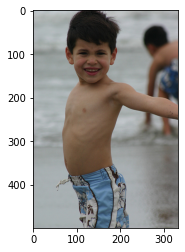

-----------------------------------
minDALLE Retrieved set
Original Caption a toddler wearing colorful shorts is standing in the water .



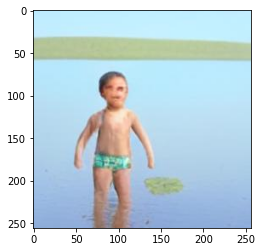

Original Caption A boy in swim trunks screams while being sprayed with water .



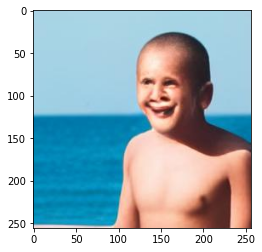

-----------------------------------
SDv2 Retrieved set
Original Caption A young boy in swimming trunks is walking with his arms outstretched on the beach .



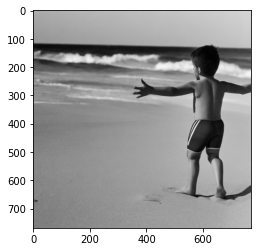

Original Caption A boy is on the beach with a paddle in his hand as he walks through the ocean water .



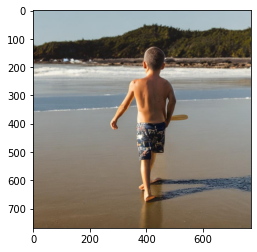

##########################################################



In [13]:
rng = 2  # queries
for j in range(1,rng):
    
    n = flickr8k_imagefile[j] + "#2"
    print("Original Caption", all_captions_flickr8k[n])
    
    print("Query Image", flickr8k_imagefile[j])
    src = "./original_images/"
    name = src + flickr8k_imagefile[j]
    im = Image.open(name)
    plt.imshow(im)
    plt.show()   
    
    print("-----------------------------------")
    print("minDALLE Retrieved set")
    for r in range(2):        
        print("Original Caption", all_captions_flickr8k[mapped_caption_ids1[j][r]])        
        image = mapped_caption_ids1[j][r].split("#")[0]
        print()
        name = "generated_images/mindalle/" + image
        im = Image.open(name)
        plt.imshow(im)
        plt.show()
        
    print("-----------------------------------")
    print("SDv2 Retrieved set")
    for r in range(2):
        print("Original Caption", all_captions_flickr8k[mapped_caption_ids2[j][r]])        
        image = mapped_caption_ids2[j][r].split("#")[0]
        print()
        name = "generated_images/sdv2/" + image
        im = Image.open(name)
        plt.imshow(im)
        plt.show()
        
    print("##########################################################")
    print()


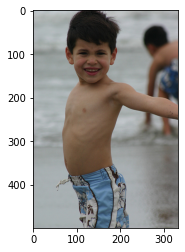

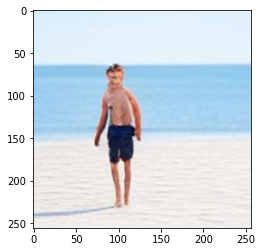

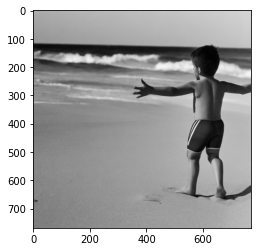

tensor(36.6739, grad_fn=<SqueezeBackward0>)
tensor(32.5086, grad_fn=<SqueezeBackward0>)
tensor(34.0667, grad_fn=<SqueezeBackward0>)


In [15]:
# CLIP Score

import torch
import torch
from PIL import Image
import torchvision.transforms as transforms

_ = torch.manual_seed(42)
from torchmetrics.multimodal import CLIPScore
metric = CLIPScore(model_name_or_path="openai/clip-vit-base-patch16")

# Read a PIL image
src = "./original_images/"
name = src + flickr8k_imagefile[1]
image = Image.open(name)
plt.imshow(image)
plt.show()

name = "generated_images/mindalle/" + flickr8k_imagefile[1]
mindalle_image = Image.open(name)
plt.imshow(mindalle_image)
plt.show()

name = "generated_images/sdv2/" + flickr8k_imagefile[1]
sdv2_image = Image.open(name)
plt.imshow(sdv2_image)
plt.show()

# Define a transform to convert PIL
# image to a Torch tensor
transform = transforms.Compose([
	transforms.PILToTensor()
])

# transform = transforms.PILToTensor()
# Convert the PIL image to Torch tensor
img_tensor_o = transform(image)
img_tensor_m = transform(mindalle_image)
img_tensor_s = transform(sdv2_image)

print(metric(img_tensor_o, "A young boy in swimming trunks is walking with his arms outstretched on the beach ."))
print(metric(img_tensor_m, "A young boy in swimming trunks is walking with his arms outstretched on the beach ."))
print(metric(img_tensor_s, "A young boy in swimming trunks is walking with his arms outstretched on the beach ."))

In [19]:
from trectools import TrecQrel, TrecRun, TrecEval

# query 2

print("trec_images/qrels_3_text_condensed")
qrels = TrecQrel("trec_images/qrels_q2.txt")
print(qrels.describe())

r1 = TrecRun("trec_images/mindalle_4_full.txt")
te1 = TrecEval(r1, qrels)
print("BLIP Results")
print(te1.get_ndcg(depth=5, removeUnjudged = True, per_query = True))

r1 = TrecRun("trec_images/sdv2_4_full.txt")
te1 = TrecEval(r1, qrels)
print("CLIPCAP Results")
print(te1.get_ndcg(depth=5, removeUnjudged = True, per_query = True))

trec_images/qrels_3_text_condensed
count    8.00000
mean     0.25000
std      0.46291
min      0.00000
25%      0.00000
50%      0.00000
75%      0.25000
max      1.00000
Name: rel, dtype: float64
BLIP Results
         NDCG@5
query          
2      0.850345
CLIPCAP Results
         NDCG@5
query          
2      0.919721


### Trec Formating

In [4]:
# TREC RUNS

# sim_sorted_img_ids = np.load("./mindalle/mapped_caption_ids.npy")  # doc no
sim_sorted_img_ids = np.load("./sdv2/mapped_caption_ids.npy")  # doc no
print(sim_sorted_img_ids.shape)

# sorted_cosine_sim = np.load("./mindalle/sorted_cosine_sim.npy")  # score
sorted_cosine_sim = np.load("./sdv2/sorted_cosine_sim.npy")  # score

print(sorted_cosine_sim.shape)

trec_run=[]
for i in range(1000):
    for j in range(977):
        qid = i + 1
        Q0 = "Q0"
        docno = sim_sorted_img_ids[i][j]
        rank = j + 1
        score = sorted_cosine_sim[i][j]
#         tag = "mindalle_4_full"
        tag = "sdv2_4_full"
        line = str(qid) + " " + Q0 + " " + str(docno) + " " + str(rank) + " " + str(score) + " " + tag
        trec_run.append(line)
trec_run

# with open('trec_images/mindalle_4_full.txt', 'w') as f:
with open('trec_images/sdv2_4_full.txt', 'w') as f:
    for line in trec_run:
        f.write(line)
        f.write('\n')

(1000, 977)
(1000, 977)


In [ ]:
# RANKINGS
  
# # sim_sorted_img_ids  # doc no    
# # query list = flickr8k_captionid

trec_rel=[]
for i in range(100):
    d = dictionary[flickr8k_imagefile[i]]
    all_image_ids = sim_sorted_img_ids[i]
    d_keys = list(d.keys())
    for j in range(50):
        qid = i + 1    
        docno = all_image_ids[j]
        if docno in d_keys:
            relevance = d[docno]
        else:
            relevance = 0
            
        line = str(qid) + " " + str(docno) + " " + str(relevance)
        trec_rel.append(line)

# with open('trec_images/rankings_mindalle.txt', 'w') as f:
with open('trec_images/rankings_sdv2.txt', 'w') as f:
    for line in trec_rel:
        f.write(line)
        f.write('\n')

In [6]:
# TrecQrel format

# qid 0 docno relevance

# where:

# qid is the query number
# 0 is the literal 0
# docno is the id of a document in your collection
# relevance is how relevant is docno for qid
# Example:
# 1 0 aldf.1864_12_000027 1
# 1 0 aller1867_12_000032 2
# 1 0 aller1868_12_000012 0
# 1 0 aller1871_12_000640 1
# 1 0 arthr0949_12_000945 0
# 1 0 arthr0949_12_000974 1

with open("flickr8k_imagefile.pkl", "rb") as f:
    flickr8k_imagefile = pickle.load(f)

path = "./dictionary_image2text.pkl"
with open(path, 'rb') as f:
    dictionary = pickle.load(f)
    
# sim_sorted_img_ids  # doc no    
# query list = flickr8k_captionid

trec_rel=[]
for i in range(1000):
    d = dictionary[flickr8k_imagefile[i]]
    all_caption_ids = sim_sorted_img_ids[i]
    d_keys = list(d.keys())
    for j in range(977):
        qid = i + 1
        Q0 = "0"
        docno = all_caption_ids[j]
        if docno in d_keys:
            relevance = d[docno]-1
        else:
            relevance = 0
        line = str(qid) + " " + Q0 + " " + str(docno) + " " + str(relevance)
        trec_rel.append(line)
#     break
trec_rel

with open('trec_images/qrels_3_highest_text_full_0_others.txt', 'w') as f:
    for line in trec_rel:
        f.write(line)
        f.write('\n')

In [7]:
# sim_sorted_img_ids -- doc no    
# query list =-- flickr8k_captionid

trec_rel=[]
for i in range(977):
    d = dictionary[flickr8k_imagefile[i]]
    d_keys = list(d.keys())
    for j in range(len(d)):
        qid = i + 1
        Q0 = "0"
        docno = d_keys[j]
        relevance = d[docno]-1
        line = str(qid) + " " + Q0 + " " + str(docno) + " " + str(relevance)
        trec_rel.append(line)

with open('trec_images/qrels_3_text_condensed.txt', 'w') as f:
    for line in trec_rel:
        f.write(line)
        f.write('\n')

## RESULTS

In [7]:
print("trec_images/qrels_3_highest_text_full_0_others")
qrels = TrecQrel("trec_images/qrels_3_highest_text_full_0_others.txt")
print(qrels.describe())

r1 = TrecRun("trec_images/mindalle_4_full.txt")
te1 = TrecEval(r1, qrels)
print("minDALLE Results")
print("NDCG at 5", te1.get_ndcg(depth=5))
print("NDCG at 10", te1.get_ndcg(depth=10))
print("NDCG at 15", te1.get_ndcg(depth=15))
print("NDCG at 20", te1.get_ndcg(depth=20))
print()
print("removeUnjudged = False, binary_topical_relevance=False")
print("rbp@5: %.4f, residuals@5: %.2f, " % te1.get_rbp( p=0.5, depth= 5, binary_topical_relevance=False, removeUnjudged = False))
print("rbp@10: %.4f, residuals@10: %.2f, " % te1.get_rbp(p=0.5, depth= 10, binary_topical_relevance=False, removeUnjudged = False))
print("rbp@15: %.4f, residuals@15: %.2f, " % te1.get_rbp(p=0.5, depth= 15, binary_topical_relevance=False, removeUnjudged = False))
print("rbp@20: %.4f, residuals@20: %.2f, " % te1.get_rbp(p=0.5, depth= 20, binary_topical_relevance=False, removeUnjudged = False))

print("---------------------------------")

r2 = TrecRun("trec_images/sdv2_4_full.txt")
te2 = TrecEval(r2, qrels)
print("SDv2 Results")
print("NDCG at 5", te2.get_ndcg(depth=5))
print("NDCG at 10", te2.get_ndcg(depth=10))
print("NDCG at 15", te2.get_ndcg(depth=15))
print("NDCG at 20", te2.get_ndcg(depth=20))
print()
print("removeUnjudged = False, binary_topical_relevance=False")
print("rbp@5: %.4f, residuals@5: %.2f, " % te2.get_rbp(p=0.5, depth= 5, binary_topical_relevance=False, removeUnjudged = False))
print("rbp@10: %.4f, residuals@10: %.2f, " % te2.get_rbp(p=0.5, depth= 10, binary_topical_relevance=False, removeUnjudged = False))
print("rbp@15: %.4f, residuals@15: %.2f, " % te2.get_rbp(p=0.5, depth= 15, binary_topical_relevance=False, removeUnjudged = False))
print("rbp@20: %.4f, residuals@20: %.2f, " % te2.get_rbp(p=0.5, depth= 20, binary_topical_relevance=False, removeUnjudged = False))

trec_images/qrels_3_highest_text_full_0_others
count    977000.000000
mean          0.003565
std           0.080432
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           3.000000
Name: rel, dtype: float64
minDALLE Results
NDCG at 5 0.09822670625450226
NDCG at 10 0.12503383367593265
NDCG at 15 0.13777658504408644
NDCG at 20 0.14690426707557014

removeUnjudged = False, binary_topical_relevance=False
rbp@5: 0.1488, residuals@5: -0.05, 
rbp@10: 0.1507, residuals@10: -0.08, 
rbp@15: 0.1507, residuals@15: -0.08, 
rbp@20: 0.1507, residuals@20: -0.08, 
---------------------------------
SDv2 Results
NDCG at 5 0.1602921460994636
NDCG at 10 0.18799952593800953
NDCG at 15 0.2048316914915185
NDCG at 20 0.2169383199458923

removeUnjudged = False, binary_topical_relevance=False
rbp@5: 0.2646, residuals@5: -0.12, 
rbp@10: 0.2666, residuals@10: -0.16, 
rbp@15: 0.2667, residuals@15: -0.16, 
rbp@20: 0.2667, residuals@20: -0.16, 


In [6]:
print("trec_images/qrels_3_highest_text_full_3_others")
qrels = TrecQrel("trec_images/qrels_3_highest_text_full_3_others.txt")
print(qrels.describe())

r1 = TrecRun("trec_images/mindalle_4_full.txt")
te1 = TrecEval(r1, qrels)
print("minDALLE Results")
print("NDCG at 5", te1.get_ndcg(depth=5))
print("NDCG at 10", te1.get_ndcg(depth=10))
print("NDCG at 15", te1.get_ndcg(depth=15))
print("NDCG at 20", te1.get_ndcg(depth=20))
print()
print("removeUnjudged = False, binary_topical_relevance=False")
print("rbp@5: %.4f, residuals@5: %.2f, " % te1.get_rbp(p=0.5, depth= 5, binary_topical_relevance=False, removeUnjudged = False))
print("rbp@10: %.4f, residuals@10: %.2f, " % te1.get_rbp(p=0.5, depth= 10, binary_topical_relevance=False, removeUnjudged = False))
print("rbp@15: %.4f, residuals@15: %.2f, " % te1.get_rbp(p=0.5, depth= 15, binary_topical_relevance=False, removeUnjudged = False))
print("rbp@20: %.4f, residuals@20: %.2f, " % te1.get_rbp(p=0.5, depth= 20, binary_topical_relevance=False, removeUnjudged = False))

print("---------------------------------")

r2 = TrecRun("trec_images/sdv2_4_full.txt")
te2 = TrecEval(r2, qrels)
print("SDv2 Results")
print("NDCG at 5", te2.get_ndcg(depth=5))
print("NDCG at 10", te2.get_ndcg(depth=10))
print("NDCG at 15", te2.get_ndcg(depth=15))
print("NDCG at 20", te2.get_ndcg(depth=20))
print()
print("removeUnjudged = False, binary_topical_relevance=False")
print("rbp@5: %.4f, residuals@5: %.2f, " % te2.get_rbp(p=0.5, depth= 5, binary_topical_relevance=False, removeUnjudged = False))
print("rbp@10: %.4f, residuals@10: %.2f, " % te2.get_rbp(p=0.5, depth= 10, binary_topical_relevance=False, removeUnjudged = False))
print("rbp@15: %.4f, residuals@15: %.2f, " % te2.get_rbp(p=0.5, depth= 15, binary_topical_relevance=False, removeUnjudged = False))
print("rbp@20: %.4f, residuals@20: %.2f, " % te2.get_rbp(p=0.5, depth= 20, binary_topical_relevance=False, removeUnjudged = False))

trec_images/qrels_3_highest_text_full_3_others
count    977000.000000
mean          2.986075
std           0.193311
min           0.000000
25%           3.000000
50%           3.000000
75%           3.000000
max           3.000000
Name: rel, dtype: float64
minDALLE Results
NDCG at 5 0.9798763084252535
NDCG at 10 0.9815073426420654
NDCG at 15 0.9825772172517269
NDCG at 20 0.98358086879329

removeUnjudged = False, binary_topical_relevance=False
rbp@5: 2.8460, residuals@5: -1.85, 
rbp@10: 2.9355, residuals@10: -1.94, 
rbp@15: 2.9383, residuals@15: -1.94, 
rbp@20: 2.9384, residuals@20: -1.94, 
---------------------------------
SDv2 Results
NDCG at 5 0.9759103909968323
NDCG at 10 0.9781379161492537
NDCG at 15 0.9794468118530244
NDCG at 20 0.9801503998512608

removeUnjudged = False, binary_topical_relevance=False
rbp@5: 2.8339, residuals@5: -1.84, 
rbp@10: 2.9231, residuals@10: -1.93, 
rbp@15: 2.9259, residuals@15: -1.93, 
rbp@20: 2.9260, residuals@20: -1.93, 


In [5]:
from trectools import TrecQrel, TrecRun, TrecEval

print("trec_images/qrels_3_text_condensed")
qrels = TrecQrel("trec_images/qrels_3_text_condensed.txt")
print(qrels.describe())

r1 = TrecRun("trec_images/mindalle_4_full.txt")
te1 = TrecEval(r1, qrels)
print("minDALLE Results")
print("NDCG at 5", te1.get_ndcg(depth=5, removeUnjudged = True))
print("NDCG at 10", te1.get_ndcg(depth=10, removeUnjudged = True))
print("NDCG at 15", te1.get_ndcg(depth=15, removeUnjudged = True))
print("NDCG at 20", te1.get_ndcg(depth=20, removeUnjudged = True))
print()
print("removeUnjudged = True, binary_topical_relevance=False")
print("rbp@5: %.4f, residuals@5: %.2f, " % te1.get_rbp(p=0.5, depth= 5, binary_topical_relevance=False, removeUnjudged = True))
print("rbp@10: %.4f, residuals@10: %.2f, " % te1.get_rbp(p=0.5, depth= 10, binary_topical_relevance=False, removeUnjudged = True))
print("rbp@15: %.4f, residuals@15: %.2f, " % te1.get_rbp(p=0.5, depth= 15, binary_topical_relevance=False, removeUnjudged = True))
print("rbp@20: %.4f, residuals@20: %.2f, " % te1.get_rbp(p=0.5, depth= 20, binary_topical_relevance=False, removeUnjudged = True))

print("---------------------------------")

r2 = TrecRun("trec_images/sdv2_4_full.txt")
te2 = TrecEval(r2, qrels)
print("SDv2 Results")
print("NDCG at 5", te2.get_ndcg(depth=5, removeUnjudged = True))
print("NDCG at 10", te2.get_ndcg(depth=10, removeUnjudged = True))
print("NDCG at 15", te2.get_ndcg(depth=15, removeUnjudged = True))
print("NDCG at 20", te2.get_ndcg(depth=20, removeUnjudged = True))
print()
print("removeUnjudged = True, binary_topical_relevance=False")
print("rbp@5: %.4f, residuals@5: %.2f, " % te2.get_rbp(p=0.5, depth= 5, binary_topical_relevance=False, removeUnjudged = True))
print("rbp@10: %.4f, residuals@10: %.2f, " % te2.get_rbp(p=0.5, depth= 10, binary_topical_relevance=False, removeUnjudged = True))
print("rbp@15: %.4f, residuals@15: %.2f, " % te2.get_rbp(p=0.5, depth= 15, binary_topical_relevance=False, removeUnjudged = True))
print("rbp@20: %.4f, residuals@20: %.2f, " % te2.get_rbp(p=0.5, depth= 20, binary_topical_relevance=False, removeUnjudged = True))

trec_images/qrels_3_text_condensed
count    5556.000000
mean        0.616091
std         0.861845
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: rel, dtype: float64
minDALLE Results
NDCG at 5 0.7300433222950173
NDCG at 10 0.7502152625264603
NDCG at 15 0.7502152625264603
NDCG at 20 0.7502152625264603

removeUnjudged = True, binary_topical_relevance=False
rbp@5: 0.9021, residuals@5: -0.32, 
rbp@10: 0.9044, residuals@10: -0.35, 
rbp@15: 0.9044, residuals@15: -0.35, 
rbp@20: 0.9044, residuals@20: -0.35, 
---------------------------------
SDv2 Results
NDCG at 5 0.75742972408742
NDCG at 10 0.7730483970668586
NDCG at 15 0.7730483970668586
NDCG at 20 0.7730483970668586

removeUnjudged = True, binary_topical_relevance=False
rbp@5: 0.9557, residuals@5: -0.35, 
rbp@10: 0.9576, residuals@10: -0.38, 
rbp@15: 0.9576, residuals@15: -0.38, 
rbp@20: 0.9576, residuals@20: -0.38, 


In [16]:
import pandas as pd
df = pd.read_csv("trec_images/qrels_3_text_condensed.txt",sep = " ", header = None)
print(len(df))
df.head()
df1 = df.groupby([0])[0].count().reset_index(name='counts')
df1.head()
df1.describe()

5556


,0,counts
count,977.000000,977.000000
mean,489.000000,5.686796
std,282.179907,1.603710
min,1.000000,2.000000
25%,245.000000,5.000000
50%,489.000000,6.000000
75%,733.000000,7.000000
max,977.000000,10.000000


In [15]:
import pandas as pd
df = pd.read_csv("trec/qrels_3_text_condensed.txt",sep = " ", header = None)
print(len(df))
df.head()
df2 = df.groupby([0])[0].count().reset_index(name='counts')
df2.head()
df2.describe()

5696


,0,counts
count,977.000000,977.000000
mean,489.000000,5.830092
std,282.179907,3.967826
min,1.000000,1.000000
25%,245.000000,3.000000
50%,489.000000,5.000000
75%,733.000000,8.000000
max,977.000000,33.000000


In [17]:
print("text to image")
print(df1.describe())
print("----------")
print("image to text")
print(df2.describe())

text to image
                0      counts
count  977.000000  977.000000
mean   489.000000    5.686796
std    282.179907    1.603710
min      1.000000    2.000000
25%    245.000000    5.000000
50%    489.000000    6.000000
75%    733.000000    7.000000
max    977.000000   10.000000
----------
image to text
                0      counts
count  977.000000  977.000000
mean   489.000000    5.830092
std    282.179907    3.967826
min      1.000000    1.000000
25%    245.000000    3.000000
50%    489.000000    5.000000
75%    733.000000    8.000000
max    977.000000   33.000000


In [5]:
from trectools import TrecQrel, TrecRun, TrecEval

print("trec_images/qrels_3_text_condensed")
qrels = TrecQrel("trec_images/qrels_3_text_condensed.txt")
print(qrels.describe())

r1 = TrecRun("trec_images/mindalle_4_full.txt")
te1 = TrecEval(r1, qrels)
print("minDALLE Results")
print("NDCG at 5", te1.get_ndcg(depth=5, removeUnjudged = True))
print("NDCG at 10", te1.get_ndcg(depth=10, removeUnjudged = True))
print("NDCG at 15", te1.get_ndcg(depth=15, removeUnjudged = True))
print("NDCG at 20", te1.get_ndcg(depth=20, removeUnjudged = True))
print()
print("removeUnjudged = True, binary_topical_relevance=False")
print("rbp@5: %.4f, residuals@5: %.12f, " % te1.get_rbp(p=0.5, depth= 5, binary_topical_relevance=True, removeUnjudged = False))
print("rbp@10: %.4f, residuals@10: %.12f, " % te1.get_rbp(p=0.5, depth= 10, binary_topical_relevance=True, removeUnjudged = False))
print("rbp@15: %.4f, residuals@15: %.12f, " % te1.get_rbp(p=0.5, depth= 15, binary_topical_relevance=True, removeUnjudged = False))
print("rbp@20: %.4f, residuals@20: %.12f, " % te1.get_rbp(p=0.5, depth= 20, binary_topical_relevance=True, removeUnjudged = False))

print("---------------------------------")

r2 = TrecRun("trec_images/sdv2_4_full.txt")
te2 = TrecEval(r2, qrels)
print("SDv2 Results")
print("NDCG at 5", te2.get_ndcg(depth=5, removeUnjudged = True))
print("NDCG at 10", te2.get_ndcg(depth=10, removeUnjudged = True))
print("NDCG at 15", te2.get_ndcg(depth=15, removeUnjudged = True))
print("NDCG at 20", te2.get_ndcg(depth=20, removeUnjudged = True))
print()
print("removeUnjudged = True, binary_topical_relevance=False")
print("rbp@5: %.4f, residuals@5: %.12f, " % te2.get_rbp(p=0.5, depth= 5, binary_topical_relevance=True, removeUnjudged = False))
print("rbp@10: %.4f, residuals@10: %.12f, " % te2.get_rbp(p=0.5, depth= 10, binary_topical_relevance=True, removeUnjudged = False))
print("rbp@15: %.4f, residuals@15: %.12f, " % te2.get_rbp(p=0.5, depth= 15, binary_topical_relevance=True, removeUnjudged = False))
print("rbp@20: %.4f, residuals@20: %.12f, " % te2.get_rbp(p=0.5, depth= 20, binary_topical_relevance=True, removeUnjudged = False))

trec_images/qrels_3_text_condensed
count    5556.000000
mean        0.616091
std         0.861845
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         3.000000
Name: rel, dtype: float64
minDALLE Results
NDCG at 5 0.7300433222950173
NDCG at 10 0.7502152625264603
NDCG at 15 0.7502152625264603
NDCG at 20 0.7502152625264603

removeUnjudged = True, binary_topical_relevance=False
rbp@5: 0.0668, residuals@5: 0.930531250000, 
rbp@10: 0.0677, residuals@10: 0.929519531250, 
rbp@15: 0.0677, residuals@15: 0.929496002197, 
rbp@20: 0.0677, residuals@20: 0.929495371819, 
---------------------------------
SDv2 Results
NDCG at 5 0.75742972408742
NDCG at 10 0.7730483970668586
NDCG at 15 0.7730483970668586
NDCG at 20 0.7730483970668586

removeUnjudged = True, binary_topical_relevance=False
rbp@5: 0.1083, residuals@5: 0.888656250000, 
rbp@10: 0.1094, residuals@10: 0.887477539063, 
rbp@15: 0.1094, residuals@15: 0.887442626953, 
rbp@20: 0.1094, residuals@20: 0.8874

# CLIP Score, FCD, FID

In [11]:
# with open('flickr8k_captionid.pkl', 'rb') as b:
#     flickr_captionid = pickle.load(b)
    
# with open('flickr8k_caption_text.pkl', 'rb') as b:
#     list_captions = pickle.load(b)
    
# # Generated Dataset formatting
# dict1 = {}
# d = flickr_captionid
# for i in range(len(d)):
#     dict1[flickr_captionid[i][:-6]] = list_captions[i]
# dict1

# with open("generated_images/flickr8k_test_clipscore.json", 'w') as f:
#     json.dump(dict1, f)

In [ ]:
# FCD - https://github.com/eyalbetzalel/fcd
# FID - https://github.com/mseitzer/pytorch-fid

In [2]:
!python ../clipscore/clipscore.py "generated_images/flickr8k_test_clipscore.json" generated_images/sdv2/

/home/shivangib/miniconda3/envs/clip/lib/python3.9/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  5.68it/s]
/home/shivangib/eccv/flickr8k_files/../clipscore/clipscore.py:153: UserWarning: due to a numerical instability, new numpy normalization is slightly different than paper results. to exactly replicate paper results, please use numpy version less than 1.21, e.g., 1.20.3.
  warnings.warn(
CLIPScore: 0.8588


In [3]:
!python ../fcd/fcd.py --path_source original_images/ --path_test generated_images/sdv2/

Preprocess Images from : original_images/
100%|██████████████████████████████████████| 1000/1000 [00:06<00:00, 145.31it/s]
Preprocess Images from : generated_images/sdv2/
100%|█████████████████████████████████████████| 978/978 [00:10<00:00, 93.43it/s]
Infernce from CLIP

31it [00:01, 28.17it/s]
Calc FCD Score:

14.978776119085268


In [7]:
!python ../pytorch-fid/src/pytorch_fid/fid_score.py original_images/ generated_images/sdv2/

100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 10.21it/s]
FID:  63.38487882861267


In [ ]:
CLIPScore: 0.8588
Calc FCD Score: 14.978776119085268
FID:  63.38487882861267

# minDALLE

In [10]:
!python ../clipscore/clipscore.py "generated_images/flickr8k_test_clipscore.json" generated_images/mindalle/

/home/shivangib/miniconda3/envs/clip/lib/python3.9/site-packages/torchvision/transforms/transforms.py:332: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
100%|█████████████████████████████████████████████| 4/4 [00:00<00:00,  4.75it/s]
/home/shivangib/eccv/flickr8k_files/../clipscore/clipscore.py:153: UserWarning: due to a numerical instability, new numpy normalization is slightly different than paper results. to exactly replicate paper results, please use numpy version less than 1.21, e.g., 1.20.3.
  warnings.warn(
CLIPScore: 0.7966


In [15]:
!python ../fcd/fcd.py --path_source original_images/ --path_test generated_images/mindalle/

Preprocess Images from : original_images/
100%|██████████████████████████████████████| 1000/1000 [00:06<00:00, 150.83it/s]
Preprocess Images from : generated_images/mindalle/
100%|████████████████████████████████████████| 977/977 [00:02<00:00, 369.39it/s]
Infernce from CLIP

31it [00:01, 27.88it/s]
Calc FCD Score:

24.69661597617454


In [9]:
!python ../pytorch-fid/src/pytorch_fid/fid_score.py original_images/ generated_images/mindalle/

100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 11.36it/s]
FID:  99.99639723101069


In [ ]:
CLIPScore: 0.7966
Calc FCD Score: 24.69661597617454
FID:  99.99639723101069